# Logistic distribution simulation

In [1]:
library(evd)
library(maxstablePCA)
library(ggplot2)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(18042024)
s <- 200

In [3]:
X1 <- rmvevd(10000, dep = .2, model = "log", d = 5)
X2 <- rmvevd(10000, dep = .5, model = "log", d = 5)
X3 <- rmvevd(10000, dep = .8, model = "log", d = 5)

In [4]:
X1trafo <- transform_unitpareto(X1)
X2trafo <- transform_unitpareto(X2)
X3trafo <- transform_unitpareto(X3)

# max-stable PCA for X1

In [5]:
summary(rowSums(X1trafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    5.00     6.82    10.21    48.94    19.99 50000.00 

In [6]:
length(which(rowSums(X1trafo) > s))

[1] 249

In [7]:
maxPCAX1P1 <- max_stable_prcomp(X1trafo, p = 1, s = s, n_initial_guesses = 1000)
maxPCAX1P2 <- max_stable_prcomp(X1trafo, p = 2, s = s, n_initial_guesses = 1000)
maxPCAX1P3 <- max_stable_prcomp(X1trafo, p = 3, s = s, n_initial_guesses = 1000)
maxPCAX1P4 <- max_stable_prcomp(X1trafo, p = 4, s = s, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [8]:
maxPCAX1P2

$p
[1] 2

$d
[1] 5

$decoder_matrix
          [,1]      [,2]
[1,] 1.6757249 0.3093981
[2,] 0.4581176 0.9729216
[3,] 0.8401921 0.9350241
[4,] 0.5533490 0.9149948
[5,] 0.3542583 1.0086173

$encoder_matrix
          [,1]      [,2]        [,3]        [,4]        [,5]
[1,] 0.5967550 0.1383767 0.008895399 0.004573121 0.009051559
[2,] 0.1119049 0.6508191 0.161491233 0.178074833 0.991455840

$reconstr_matrix
          [,1]      [,2]       [,3]       [,4]      [,5]
[1,] 0.9999972 0.2318813 0.04996508 0.05509601 0.3067545
[2,] 0.2733840 0.6331960 0.15711831 0.17325286 0.9646088
[3,] 0.5013888 0.6085316 0.15099820 0.16650426 0.9270351
[4,] 0.3302138 0.5954961 0.14776363 0.16293754 0.9071769
[5,] 0.2114054 0.6564275 0.16288286 0.17960936 0.9999995

$loss_fctn_value
[1] 0.8177948

$optim_conv_status
[1] 4

$s
[1] 200

$starting_vals
$starting_vals$encoder_matrix_x0
          [,1]      [,2]
[1,] 0.8805899 0.9028686
[2,] 0.8694223 0.9790714
[3,] 0.8475275 0.9498502
[4,] 1.0000000 1.0000000
[5,] 0.899

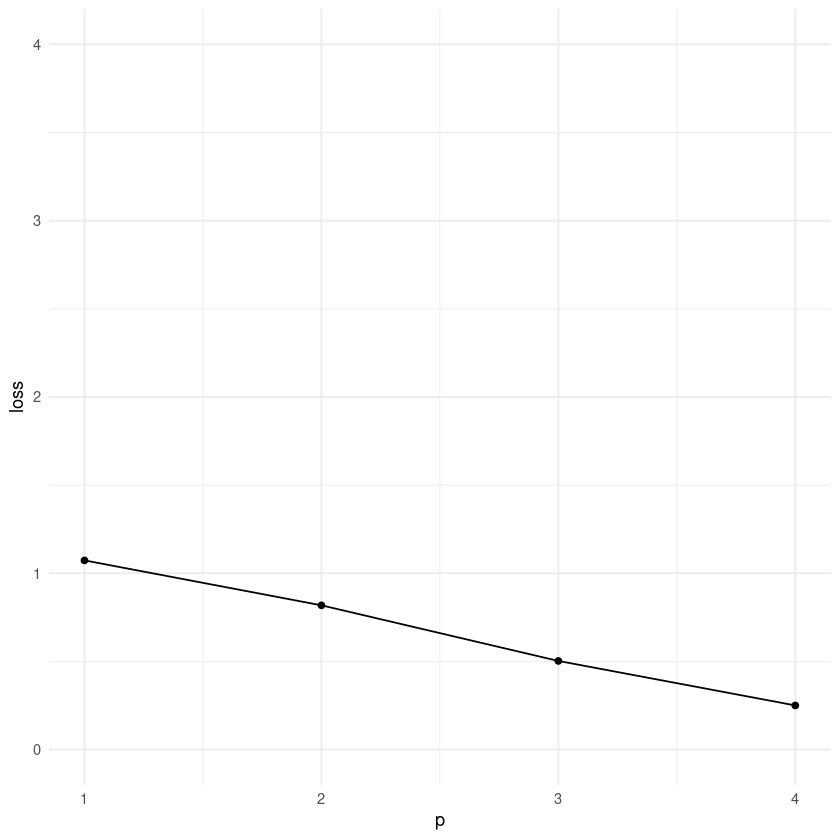

In [9]:
plotlossdatX1 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX1P1$loss_fctn_value, 
        maxPCAX1P2$loss_fctn_value, 
        maxPCAX1P3$loss_fctn_value, 
        maxPCAX1P4$loss_fctn_value

    )
)

pe1 <- ggplot(aes(x = p, y = loss), data = plotlossdatX1) + geom_line() + geom_point() + ylim(0,4) + theme_minimal()
pe1

In [10]:
ggsave("logistic_dephigh_elbow.png", pe1)

Saving 6.67 x 6.67 in image


In [11]:
rec1 <- t(maxmatmul(maxPCAX1P3$reconstr_matrix, t(exp(X1))))

In [12]:
datX1 <- data.frame(exp(X1))
datX1$is_rec = "original"
datrec1 <- data.frame(rec1)
datrec1$is_rec = "reconstruction"
names(datrec1) <- names(datX1)
plot_datX1 <- full_join(datX1, datrec1)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


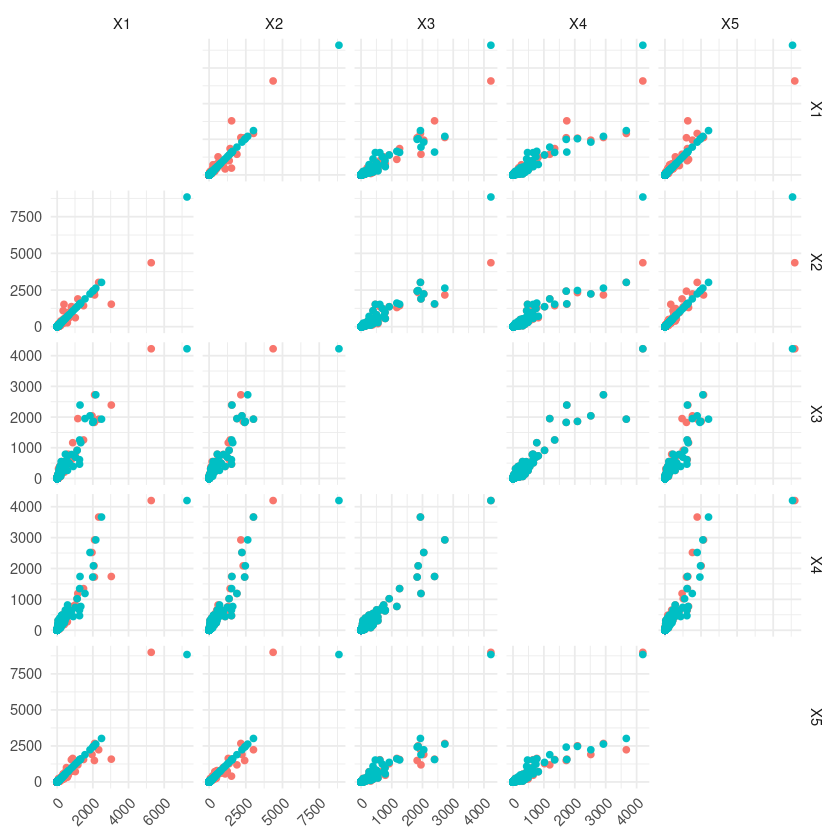

In [13]:
p1 <- ggpairs(
    plot_datX1, 
    aes(color = is_rec), 
    columns = 1:5,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p1

In [14]:
ggsave("logistic_dephigh.png", p1)

Saving 6.67 x 6.67 in image


# Max-stable PCA for X2

In [15]:
length(which(rowSums(X2trafo) > s))

[1] 256

In [16]:
maxPCAX2P1 <- max_stable_prcomp(X2trafo, p = 1, s = s, n_initial_guesses = 1000)
maxPCAX2P2 <- max_stable_prcomp(X2trafo, p = 2, s = s, n_initial_guesses = 1000)
maxPCAX2P3 <- max_stable_prcomp(X2trafo, p = 3, s = s, n_initial_guesses = 1000)
maxPCAX2P4 <- max_stable_prcomp(X2trafo, p = 4, s = s, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



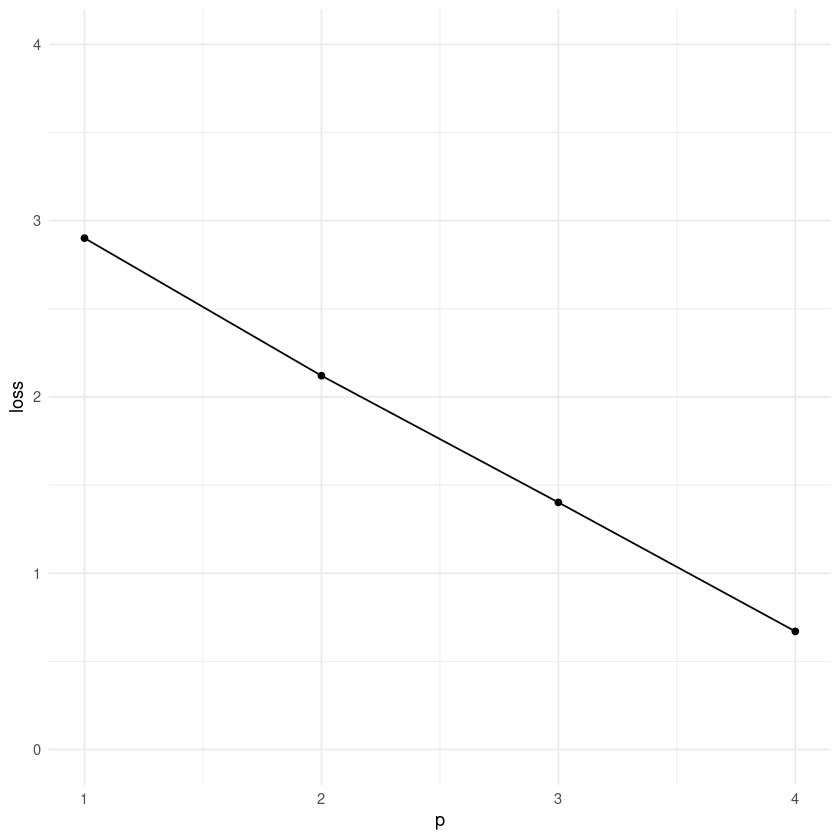

In [17]:
plotlossdatX2 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX2P1$loss_fctn_value,
        maxPCAX2P2$loss_fctn_value,
        maxPCAX2P3$loss_fctn_value,
        maxPCAX2P4$loss_fctn_value

    )
)

pe2 <- ggplot(aes(x = p, y = loss),  data = plotlossdatX2) + geom_line() + geom_point() + ylim(0,4) + theme_minimal()
pe2

In [18]:
ggsave("logistic_depmed_elbow.png", pe2)

Saving 6.67 x 6.67 in image


In [19]:
rec2 <- t(maxmatmul(maxPCAX2P3$reconstr_matrix, t(exp(X2))))

In [20]:
datX2 <- data.frame(exp(X2))
datX2$is_rec = "original"
datrec2 <- data.frame(rec2)
datrec2$is_rec = "reconstruction"
names(datrec2) <- names(datX2)
plot_datX2 <- full_join(datX2, datrec2)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


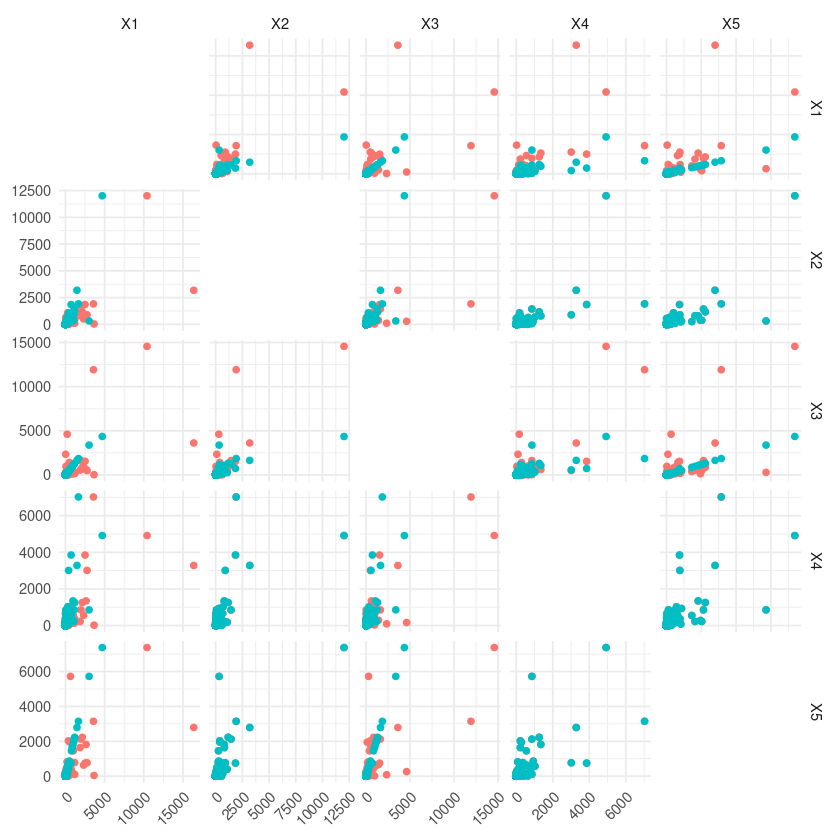

In [21]:
p2 <- ggpairs(
    plot_datX2, 
    aes(color = is_rec), 
    columns = 1:5,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p2

In [22]:
ggsave("logistic_depmed.png", p2)

Saving 6.67 x 6.67 in image


# Same for X3

In [23]:
length(which(rowSums(X3trafo) > s))

[1] 256

In [24]:
maxPCAX3P1 <- max_stable_prcomp(X3trafo, p = 1, s = s, n_initial_guesses = 1000)
maxPCAX3P2 <- max_stable_prcomp(X3trafo, p = 2, s = s, n_initial_guesses = 1000)
maxPCAX3P3 <- max_stable_prcomp(X3trafo, p = 3, s = s, n_initial_guesses = 1000)
maxPCAX3P4 <- max_stable_prcomp(X3trafo, p = 4, s = s, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



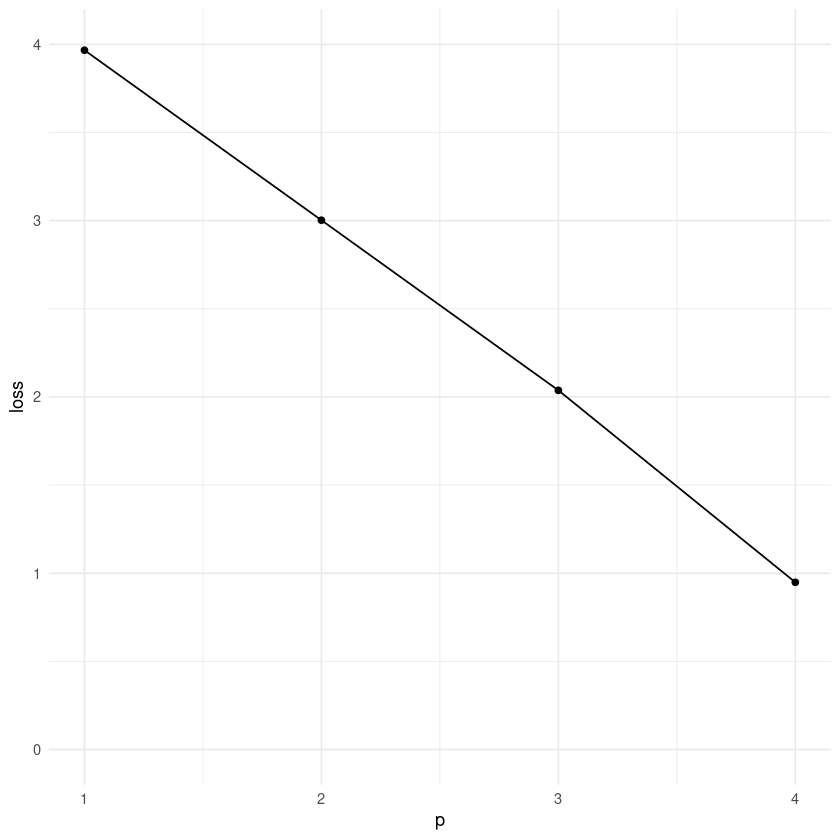

In [25]:
plotlossdatX3 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX3P1$loss_fctn_value,
        maxPCAX3P2$loss_fctn_value,
        maxPCAX3P3$loss_fctn_value,
        maxPCAX3P4$loss_fctn_value

    )
)

pe3 <- ggplot(aes(x = p, y = loss),  data = plotlossdatX3) + geom_line() + geom_point() + ylim(0,4) + theme_minimal()
pe3

In [26]:
ggsave("logistic_deplow_elbow.png", pe3)

Saving 6.67 x 6.67 in image


In [29]:
rec3 <- t(maxmatmul(maxPCAX3P3$reconstr_matrix, t(exp(X3))))

In [30]:
datX3 <- data.frame(exp(X3))
datX3$is_rec = "original"
datrec3 <- data.frame(rec3)
datrec3$is_rec = "reconstruction"
names(datrec3) <- names(datX3)
plot_datX3 <- full_join(datX3, datrec3)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


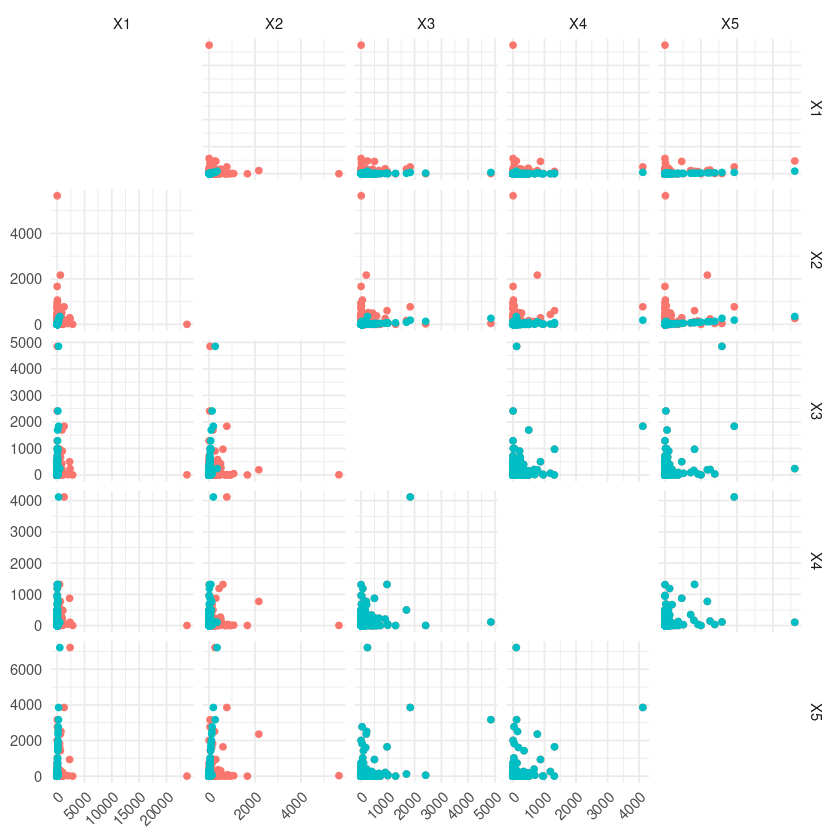

In [31]:
p3 <- ggpairs(
    plot_datX3, 
    aes(color = is_rec), 
    columns = 1:5,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p3

In [32]:
ggsave("logistic_deplow.png", p3)

Saving 6.67 x 6.67 in image
